<a href="https://colab.research.google.com/github/Faranha300/Atv-Analise-de-Dados/blob/main/atv_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Aluno**: Fabrício Aranha Ferreira <faf3@cin.ufpe.br>

# Imports e Downloads

In [ ]:
!pip install matplotlib pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/Faranha300/Atv-Analise-de-Dados/refs/heads/main/Titanic-Dataset.csv"
df = pd.read_csv(url)

# Análise Exploratória Rápida

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Visualizações com matplotlib

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

## Gráfico de Linha

<ipython-input-24-3832756737>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100


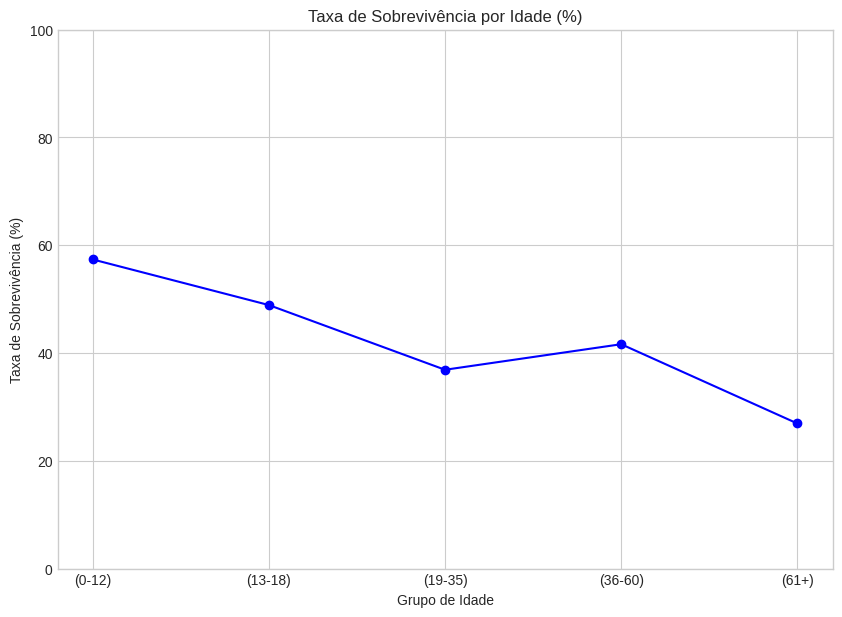

In [ ]:
plt.figure(figsize=(10, 7))
bins = [0, 12, 18, 35, 60, 81]
labels = ['(0-12)', '(13-18)', '(19-35)', '(36-60)', '(61+)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100

plt.plot(survival_by_age_group.index, survival_by_age_group.values, marker='o', linestyle='-', color='b')
plt.title('Taxa de Sobrevivência por Idade (%)')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xlabel('Grupo de Idade')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

As pessoas mais novas tiveram uma maior chance de sobreviver.

## Gráfico de Barras

<Figure size 800x600 with 0 Axes>

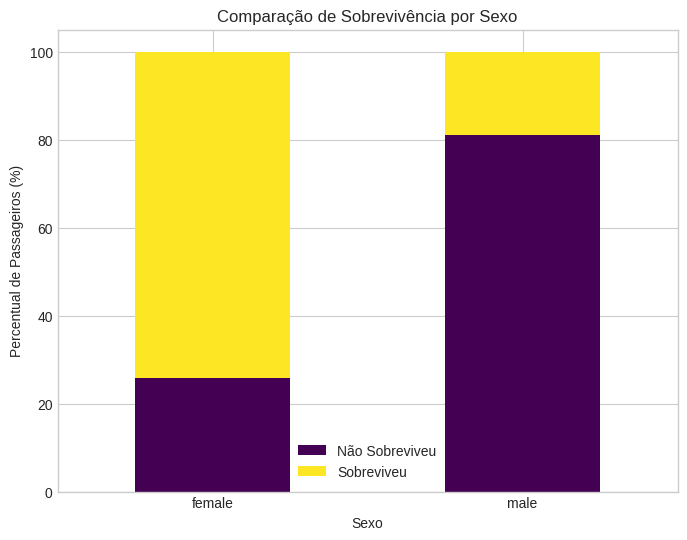

In [ ]:
plt.figure(figsize=(8, 6))
survival_by_sex = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack().fillna(0) * 100
ax = survival_by_sex.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,6))
plt.title('Comparação de Sobrevivência por Sexo')
plt.ylabel('Percentual de Passageiros (%)')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

As Mulheres tiveram uma maior chance de sobreviver.

## Gráfico de Pizza

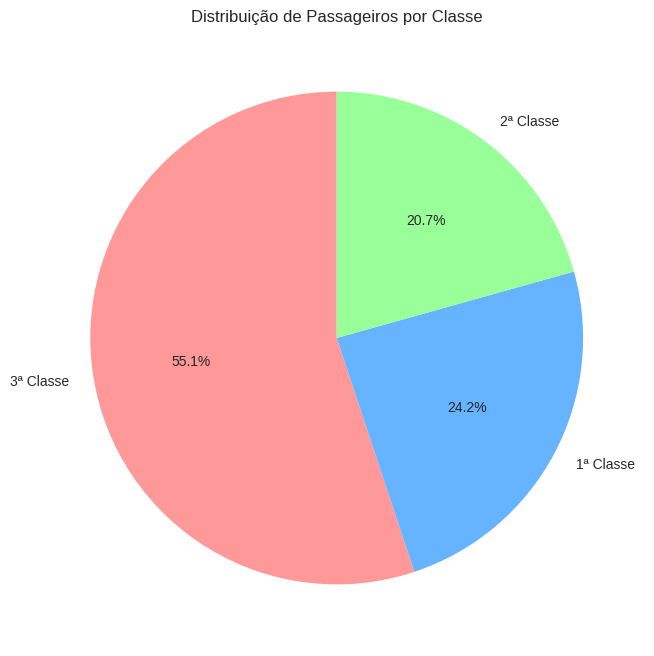

In [ ]:
plt.figure(figsize=(8, 8))
class_counts = df['Pclass'].value_counts()
plt.pie(class_counts, labels=[f'{i}ª Classe' for i in class_counts.index], autopct='%1.1f%%',
        startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribuição de Passageiros por Classe')

plt.show()

A 3º classe foi a mais escolhida sendo 55.1%, seguido da 1º classe com 24.2% e da 2º classe 20.7%

## Gráfico de Dispersão

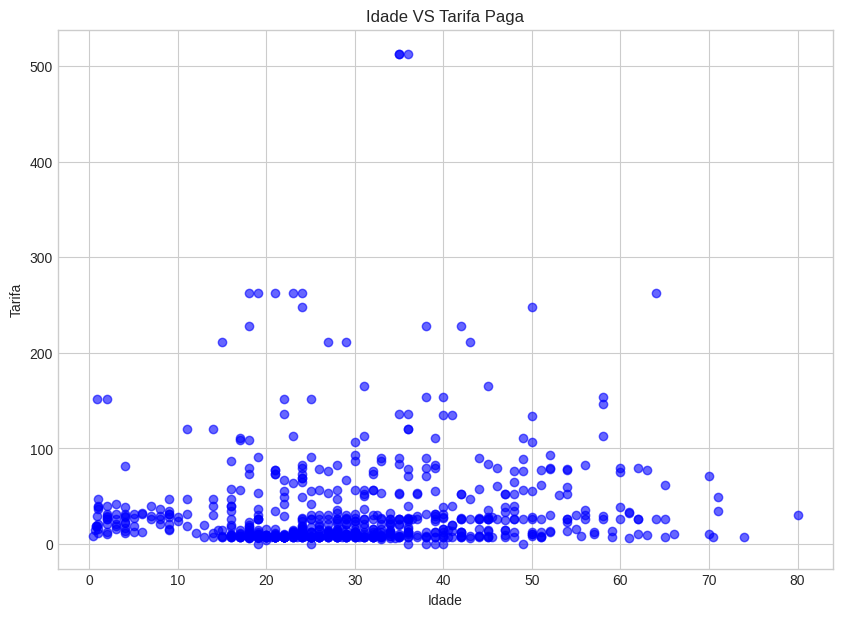

In [78]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Age'], df['Fare'], c='b', alpha=0.6)
plt.title('Idade VS Tarifa Paga')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

É possível ver que boa parte das pessoas que pagaram uma menor tarifa sobreviveram, além de serem as pessoas mais novas também.

# Desafio Final

In [ ]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Taxa de Sobrevivência por Classe:")
for p_class, rate in survival_by_class.items():
    print(f"   - {p_class}ª Classe: {rate:.2%}")

Taxa de Sobrevivência por Classe:
   - 1ª Classe: 62.96%
   - 2ª Classe: 47.28%
   - 3ª Classe: 24.24%


As pessoas que pagaram pelas maiores classes tiveram uma maior chance de sobreviver

In [ ]:
print("Taxa de Sobrevivência por Grupo de Idade:")
for group, rate in survival_by_age_group.items():
    print(f"   - {group}: {rate:.2f}%")

Taxa de Sobrevivência por Grupo de Idade:
   - (0-12): 57.35%
   - (13-18): 48.89%
   - (19-35): 36.89%
   - (36-60): 41.63%
   - (61+): 26.92%


As pessoas mais novas tiveram uma maior chance de sobreviver. Porém é possível ver que (19-35) teve uma chance menor que (36-60)

In [ ]:
survival_by_sex_final = df.groupby('Sex')['Survived'].mean()
print("Taxa de Sobrevivência por Sexo:")
for sex, rate in survival_by_sex_final.items():
    sex_label = "Feminino" if sex == "female" else "Masculino"
    print(f"   - {sex_label}: {rate:.2%}")

Taxa de Sobrevivência por Sexo:
   - Feminino: 74.20%
   - Masculino: 18.89%


As Mulheres tiveram uma maior chance de sobreviver.